# Hand Pose 

In [1]:
import utils as u 

2024-04-22 13:11:11.556515: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_data, y_data = u.load_data() 
print(y_data)

[1 1 1 ... 0 0 0]


In [3]:
x_data, y_data = u.shuffle_data(x_data, y_data, random_seed=20) 
print(y_data)

[0 1 0 ... 1 0 0]


In [4]:
split_idx = int(len(x_data) * 0.8)
x_train, y_train, x_test, y_test = u.split_data(x_data, y_data, split_idx)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(84059, 63) (84059,) (21015, 63) (21015,)


In [6]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(75654, 63) (75654,) (21015, 63) (21015,)


In [8]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
0.7839571237564087
-0.21448005735874176
2
0.7839571237564087
-0.21448005735874176


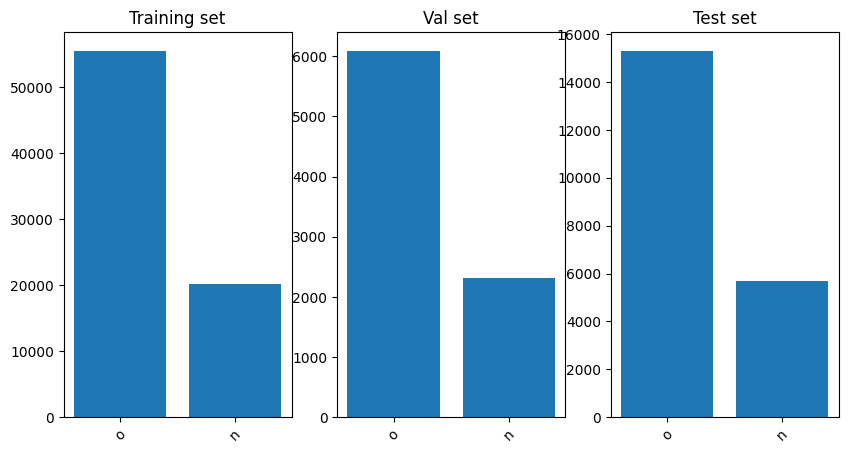

In [9]:
u.explore_data(x_train, y_train, y_test, y_val)

In [10]:
model = u.build_model()


In [11]:
class_weights = {0: 0.3, # o
                 1: 1} # n

In [12]:
history, model = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=30, batch_size=64, class_weights=class_weights)

Epoch 1/30
1183/1183 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.5828 - val_loss: 0.5516 - val_accuracy: 0.6068
Epoch 2/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.2554 - accuracy: 0.5797 - val_loss: 0.5355 - val_accuracy: 0.6560
Epoch 3/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.2548 - accuracy: 0.5788 - val_loss: 0.5894 - val_accuracy: 0.5906
Epoch 4/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.2544 - accuracy: 0.5799 - val_loss: 0.5752 - val_accuracy: 0.5697
Epoch 5/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.2542 - accuracy: 0.5857 - val_loss: 0.6034 - val_accuracy: 0.5655
Epoch 6/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.2542 - accuracy: 0.5818 - val_loss: 0.6061 - val_accuracy: 0.5678
Epoch 7/30
1183/1183 [==============================] - 2s 2ms/step - loss: 0.2539 - accuracy: 0.5884 - val_loss: 0.6326 - val_accuracy:

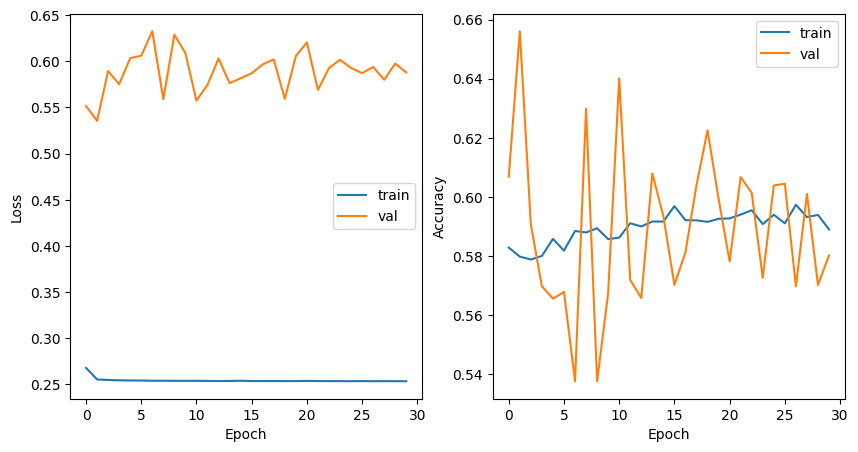

In [13]:
u.plot_loss(history)

In [14]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

657/657 [==============================] - 1s 926us/step
[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [0]]


In [15]:
model.save('./Handpose-Recognition.h5')

/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
print(test_acc)

0.5726385914822746


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               16384     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 18965 (74.08 KB)
Trainable params: 18965 (74.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week5-Real-Time-Handpose-Recognition/ML/Handpose-Recognition.keras \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week5-Real-Time-Posture-Recognition/tfjsmodel


Traceback (most recent call last):
  File "/Users/qianruzhang/anaconda3/envs/dl4m/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 958, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 962, in main
    convert(argv[0].split(' '))
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 948, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 634, in _dispatch_converter
    dispatch_keras_h5_to_tfjs_graph_model_conversion(
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/co